# Start Time

In [1]:
import time

start_time = time.time()

# Forest Fires

## ASK

What factors do affect forest fires?  
- Weather Conditions:
    - Temperature
    - Humidity
    - Wind
    - Rainfall
- Fuel Load and Moisture:
    - Fuel Type
    - Fuel Moisture
- Ignition Sources:
    - Human Activities
    - Lightning
- Drought and Climate Conditions:
    - Long-term Drought
    - Climate Change

## PREPARE

### Importing needed packages

In [2]:
# Needed packages to manipulate the data
import pandas as pd
import numpy as np

# Needed packages to visualize the data
import matplotlib.pyplot as plt

# Needed packages to prepare the data for the Neural Network Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Needed packages to deploy the Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Uploading the Dataset

In [3]:
path = "C:/Users/muazs/Desktop/Sprints/Project 3/forestfires.csv"

data = pd.read_csv(path) # reading the dataset using read_csv

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## PROCESS

### Exploring the Dataset

#### Shape

In [4]:
data.shape # extracting the dataset shape

(517, 13)

The data have 517 rows and 13 columns

#### Description

In [5]:
data.describe().T # description of the numerical attributes

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [6]:
data.describe(include = 'O').T # description of the object attributes

,count,unique,top,freq
month,517,12,aug,184
day,517,7,sun,95


We can see that:
- The majority of rain values are zero
- As mentioned in the project description, most area values seem to be around zero, and the distribution is skewed towards zero
- There is a significant outlier in the area column that requires further investigation
- Considering that the data is about forest fires, the most immediate relationship that comes to mind is with temperature. August is typically the hottest month, and consequently, it has the highest frequency of fire occurrences

#### Column Types

In [7]:
data.dtypes # seeing each column type

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

We have 3 integer columns, 2 object columns, and 8 float columns 

### Removing Duplicates

In [8]:
data.duplicated().sum() # checking duplicates count

4

In [9]:
data.drop_duplicates(inplace = True) # removing the duplicates

### Handling Outliers / Skewness

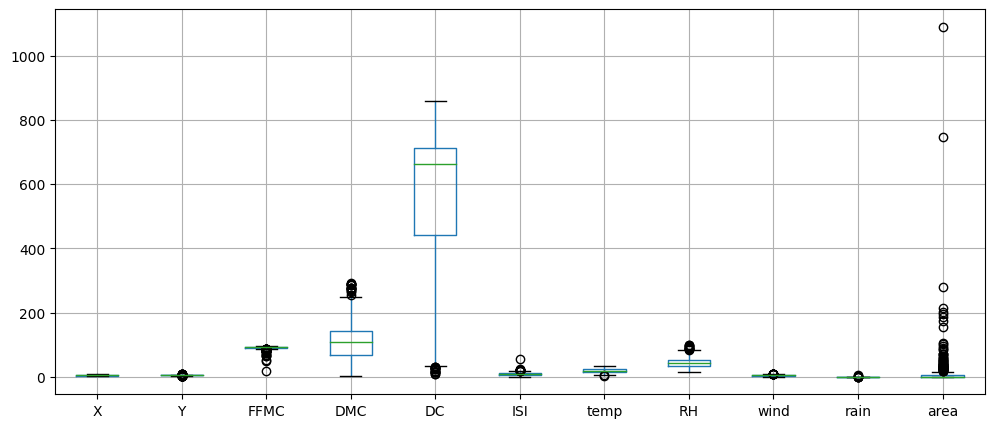

In [10]:
data.boxplot(figsize=(12, 5))
plt.show()

Based on the boxplot there's outliers using our eyes in:
- FFMC
- DMC
- DC
- ISI
- RH
- area

#### Checking area

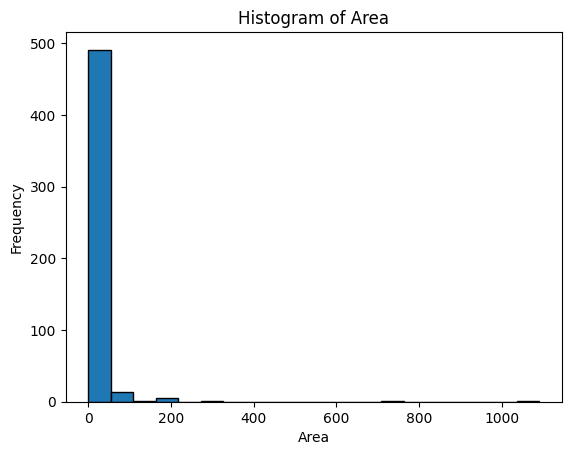

In [11]:
# Viewing a histogram before transformation
plt.hist(data['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.show()

In [12]:
# Applying the logarithmic function on area
data['area'] = np.log(data['area'] + 1) # Logarithmic function was applied based on the project description

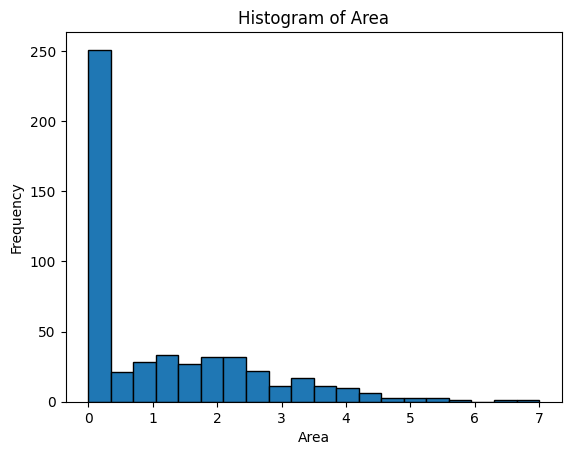

In [13]:
# Viewing a histogram after transformation
plt.hist(data['area'], bins=20, edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')
plt.show()

#### Checking FFMC

Based on my research about FFMC in portugal the min was 0 and the max was 100

In [14]:
print(data['FFMC'].min())
print(data['FFMC'].max())

18.7
96.2


So no need to remove outliers in it

#### Checking DMC

Based on my research about DMC in portugal the min was 0 and the max was open ended

In [15]:
print(data['DMC'].min())
print(data['DMC'].max())

1.1
291.3


So no need to remove outliers in it

#### Checking DC

Based on my research about DC in portugal the min was 0 and the max 80

In [16]:
print(data['DC'].min())
print(data['DC'].max())

7.9
860.6


In [17]:
len(data[data['DC'] > 80])

462

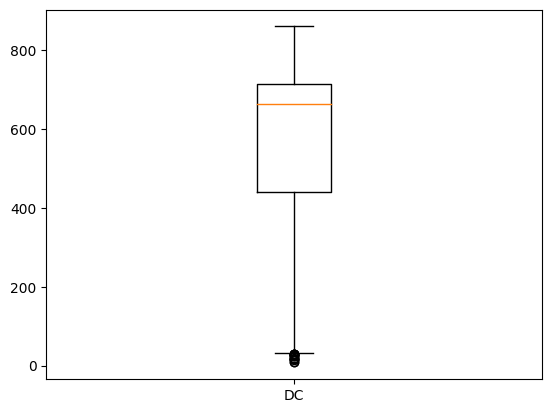

In [18]:
# Drawing a boxplot to check furthermore
cols = ['DC']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

But based on the boxplot and the count of values in DMC above 80 are 462 then I will not remove it because I'm not sure of my refrences' values

#### Checking ISI

Based on my research about ISI in portugal the min was 0 and the max 60

In [19]:
print(data['ISI'].min())
print(data['ISI'].max())

0.0
56.1


So no need to remove outliers in it

#### Checking RH

Based on my research about RH in portugal the min was 30% and the max 95%

In [20]:
print(data['RH'].min())
print(data['RH'].max())

15
100


In [21]:
len(data[(data['RH'] > 95) | (data['RH'] < 30)]) # Count of the values that will be removed

106

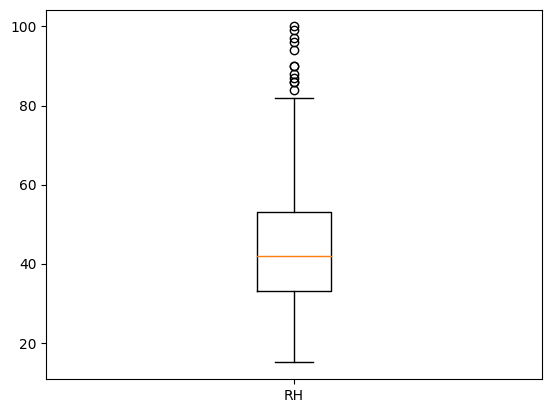

In [22]:
# Drawing a boxplot to check furthermore
cols = ['RH']

plt.boxplot(data[cols].values, labels=cols)
plt.show()

We will need to remove the values below 30 and above 95 since also its count is not that big and the range of values is in the same area of the boxplot

In [23]:
data = data.loc[(data['RH'] <= 95) & (data['RH'] >= 30)]

### Handling Nulls

In [24]:
data.isnull().sum() # checking duplicates sum

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There are no Nulls

## ANALYZE

### Understanding the Variables More

#### Variable Real Names
- FFMC  ->  Fine Fuel Moisture Code, represents fuel moisture of forest litter fuels under the shade of a forest canopy
- DMC   ->  Duff Moisture Code, represents fuel moisture of decomposed organic material underneath the litter
- DC    ->  Drought Code, much like the Keetch-Byrum Drought Index, represents drying deep into the soil
- ISI   ->  Initial Spread Index, is a numeric rating of the expected rate of fire spread

#### Removing area with fires equal to 0 to correctly view the data

In [25]:
# I wanted to see the damaged area only because that will make me understand how other variables affect on it
dataviz = data[data['area']>0] 

#### Month

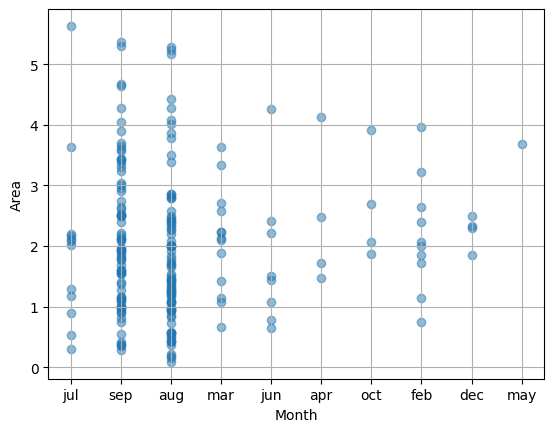

In [26]:
# Drawing a scatterplot to view the count of areas with fire per month
plt.scatter(dataviz['month'], dataviz['area'], alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Area')
plt.grid(True)
plt.show()

In [27]:
dataviz['month'].value_counts() # Count of areas with fires per month

month
aug    83
sep    76
mar    13
jul    12
feb    10
jun     8
apr     4
oct     4
dec     4
may     1
Name: count, dtype: int64

Since, august and september are the summer times.. it's logical that fire could happen during that time due to temprature

#### Temprature

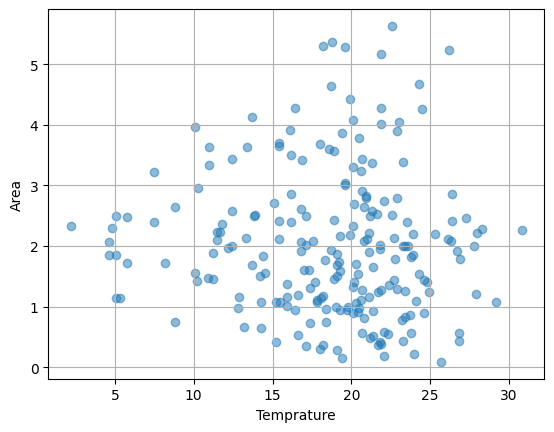

In [28]:
# Drawing a scatterplot to view the count of areas with fire per temprature
plt.scatter(dataviz['temp'], dataviz['area'], alpha=0.5)
plt.xlabel('Temprature')
plt.ylabel('Area')
plt.grid(True)
plt.show()

When the temprature rises the area of the fire also increases

In [29]:
dataviz['temp'].value_counts() # Count of areas with fires per temp

temp
21.9    5
20.1    5
20.7    4
15.4    4
19.1    4
       ..
22.4    1
18.8    1
16.1    1
13.4    1
27.8    1
Name: count, Length: 125, dtype: int64

#### Rain

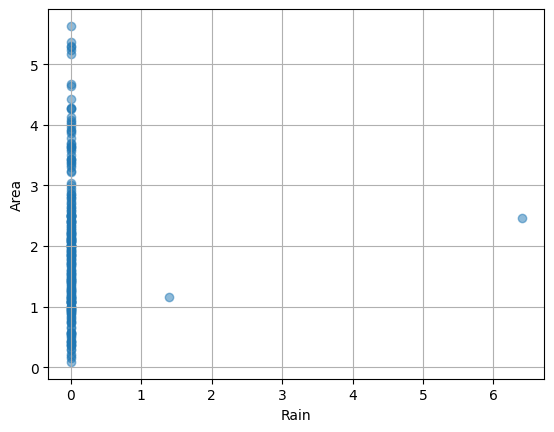

In [30]:
# Drawing a scatterplot to view the count of areas with fire per rain
plt.scatter(dataviz['rain'], dataviz['area'], alpha=0.5)
plt.xlabel('Rain')
plt.ylabel('Area')
plt.grid(True)
plt.show()

In [31]:
dataviz['rain'].value_counts(normalize = True)*100 # seeing the percentage of rain to areas with fire

rain
0.0    99.069767
6.4     0.465116
1.4     0.465116
Name: proportion, dtype: float64

As seen where no rain is available, there's a high possibility of fire by 99%

### Enrichment

#### Creating a new Season column based on the month

In [32]:
# Adding a new fetaure like season can help the model understand better which seasons can contain more fire
# since they have a strong relatioship with temprature and the month 
data['season'] = data['month'].apply(lambda x: 'Winter' if x in ['jan', 'feb', 'dec'] else
                                      'Spring' if x in ['mar', 'apr', 'may'] else
                                      'Summer' if x in ['jun', 'jul', 'aug'] else
                                      'Fall' if x in ['sep', 'oct', 'nov'] else None)

In [33]:
data['season'].value_counts(normalize = True)*100 # seeing the percentage of season to areas

season
Summer    47.911548
Fall      35.872236
Spring    10.073710
Winter     6.142506
Name: proportion, dtype: float64

After removing the outliers there were no any month in winter or spring left

### Encoding the Data for NN

In [34]:
data = pd.get_dummies(data, columns=['month', 'day', 'season']) # encoding the month, day, and season

In [35]:
data = data.astype(int) # Transforming the values from True/False to 1/0

In [36]:
data.head() # viewing the data after encoding

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,season_Fall,season_Spring,season_Summer,season_Winter
0,7,5,86,26,94,5,8,51,6,0,...,0,0,0,0,0,0,0,1,0,0
1,7,4,90,35,669,6,18,33,0,0,...,0,0,0,0,1,0,1,0,0,0
2,7,4,90,43,686,6,14,33,1,0,...,0,1,0,0,0,0,1,0,0,0
7,8,6,91,145,608,10,8,86,2,0,...,1,0,0,0,0,0,0,0,1,0
8,8,6,91,129,692,7,13,63,5,0,...,0,0,0,0,1,0,1,0,0,0


## NEURAL NETWORK

### Features

In [37]:
x = data.drop('area', axis=1) # as per the domain knowledge in the ask phase, all features are important

### Target

In [38]:
y = data['area'] # extracting the target attribute 

### Splitting the Dataset

In [39]:
# Splitting the data to 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

### Normalizing

In [40]:
# Using standard scaler to normalize the x train and x test
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model

In [41]:
x_train.shape

(284, 33)

In [42]:
# Deploying the model with 4 hidden layers
model = Sequential([
    Dense(24, activation='relu', input_shape=(x_train.shape[1],)), # Input layer are 24 based on my fetaures 
    Dropout(0.2), # I used a dropout value of 0.2 to prevent overfitting
    Dense(250, activation='relu'), # I started by 250 neuron and started to decrease them by the 2/3 rule and i used the relu as an activation function
    Dense(166, activation='relu'), # 2nd hidden layer
    Dense(110, activation='relu'), # 3rd hidden layer
    Dense(73, activation='relu'), # 4th hidden layer
    Dense(1)  # Output layer which is one since the area is continious
])

In [43]:
# Compile the model using adam optimizer with loss function of MSE and my metrics was accuracy to see the percentage 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Training the model 
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
9/9 [==============================] - 3s 6ms/step - loss: 1.5088 - accuracy: 0.4261
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 1.3352 - accuracy: 0.2782
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 1.2839 - accuracy: 0.2958
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 1.1872 - accuracy: 0.2782
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 1.2274 - accuracy: 0.4085
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 1.1782 - accuracy: 0.2676
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 1.1713 - accuracy: 0.3732
Epoch 8/500
1/9 [==>...........................] - ETA: 0s - loss: 1.2454 - accuracy: 0.3438

9/9 [==============================] - 0s 6ms/step - loss: 1.1436 - accuracy: 0.3486
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - loss: 1.1464 - accuracy: 0.3521
Epoch 10/500
9/9 [==============================] - 0s 5ms/step - loss: 1.0676 - accuracy: 0.3662
Epoch 11/500
9/9 [==============================] - 0s 6ms/step - loss: 1.1842 - accuracy: 0.3275
Epoch 12/500
9/9 [==============================] - 0s 5ms/step - loss: 1.1081 - accuracy: 0.3908
Epoch 13/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0679 - accuracy: 0.3380
Epoch 14/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0904 - accuracy: 0.4155
Epoch 15/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0357 - accuracy: 0.3345
Epoch 16/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0717 - accuracy: 0.4577
Epoch 17/500
9/9 [==============================] - 0s 6ms/step - loss: 1.0269 - accuracy: 0.3627
Epoch 18/500
9/9 [================

In [44]:
# Evaluating the model
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 2.3653 - accuracy: 0.4146


[2.3652637004852295, 0.4146341383457184]

The model predicted my test dataset with loss 2.36 of and accuracy of 0.41

# End Time

In [45]:
end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print("Total runtime:", minutes, "minutes and", seconds, "seconds")

Total runtime: 0 minutes and 54 seconds
